# Titanic: Machine Learning from Diaster
For this attempt on solving this classical problem, I shall be following the steps of a data science framework from [this Kaggle kernal](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy):
* Define the problem
* Gather the data
* Prepare data for consumption
* Perform exploratory analysis
* Model data
* Validate and implement data model
* Optimise and strategise

## Step 1: Define the problem
This competition provides data about the Titanic's passengers. The aim is to build a model that can accurately predict whether or not a passenger will survive. This is a binary classification problem.

## Step 2: Gather the Data
This step requires no action since the dataset was provided by Kaggle.

## Step 3: Prepare Data for Consumption
Many of the standard processes of data wrangling are not required for this dataset as it is already presented fit for purpose.
The data does require cleaning.

### 3.1 Import Libraries

In [114]:
# import packages
import pandas as pd
import numpy as np

import IPython
from IPython import display

import re
import sklearn

# import data visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# configure visualisation defaults
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('whitegrid')
pylab.rcParams['figure.figsize'] = 12,8

# common model algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

# common model helpers
from sklearn import feature_selection, model_selection, metrics

## 3.2 Understand the data
Here I will understand the data and see what types of data are presented (i.e. indepedent/feature variables or dependent/target variables).

### The 4 C's of Data Cleaning: Correcting, Completing, Creating , and Converting
* Correcting - Upon review, the data does not seem to contain any outliers.
* Completing - There are missing values in train data: Age, Cabin, and Embarked columns. For the test data, there are missing values in the Age, Fare and Cabin columns. I shall impute the missing records rather than delete them.
* Creating - This involves feature engineering where I will create new features to determine if they provide new signals to predict the outcome. I will create a title feature to determine whether there is correlation with survival.
* Converting - For this dataset, the object datatypes will be converted to dummy variables.

In [115]:
train = pd.read_csv('/Users/vinhe/Code/Data/titanic/train.csv')
test = pd.read_csv('/Users/vinhe/Code/Data/titanic/test.csv')

In [116]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [117]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Riordan, Miss. Johanna Hannah""""",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [119]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


A quick look at the data shows that there are 819 rows in the train data and 418 in the test data. 
Name, Sex, Ticket, Cabin and Embarked are categorical variables. Name contains a name and a title.

In [120]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

### 3.2.1 - Completing data

In [121]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [122]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### 3.2.1.1 Age
Missing values for Age shall be filled. One simple method would be to fill by mean/median but I wish to see if there is an existing feature that has a correlation with Age and use that to determine the missing Age values.

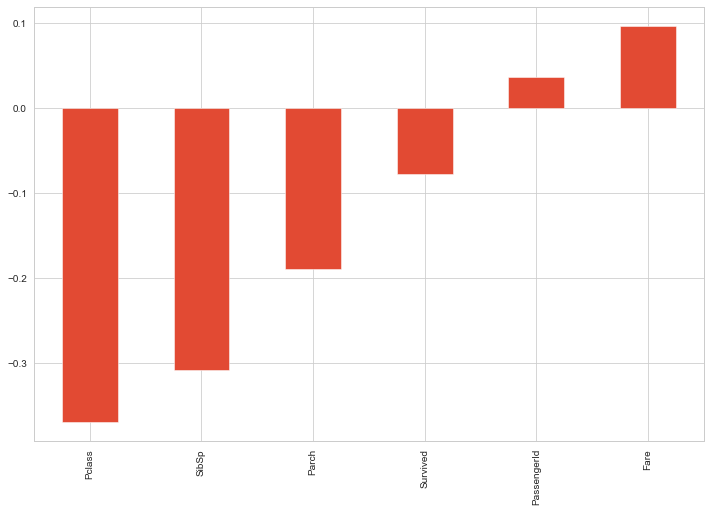

In [123]:
train.corr()['Age'].sort_values().drop('Age').plot(kind='bar')

It seems that Pclass has the higher correlation to Age, so I shall use this to impute the missing Age values.

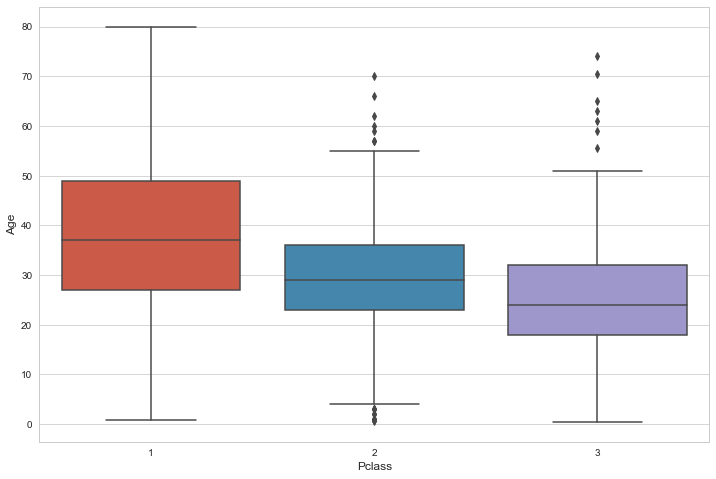

In [124]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [125]:
# Impute Age

def fill_age(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return round(train[train['Pclass'] == 1]['Age'].mean(),0)
        elif Pclass == 2:
            return round(train[train['Pclass'] == 2]['Age'].mean(),0)
        else: 
            return round(train[train['Pclass'] == 3]['Age'].mean(),0)
    
    else:
        return Age

In [126]:
train['Age'] = train[['Age','Pclass']].apply(fill_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(fill_age,axis=1)

### 3.2.1.2 Embarked
I simply fill the missing values with the most common value

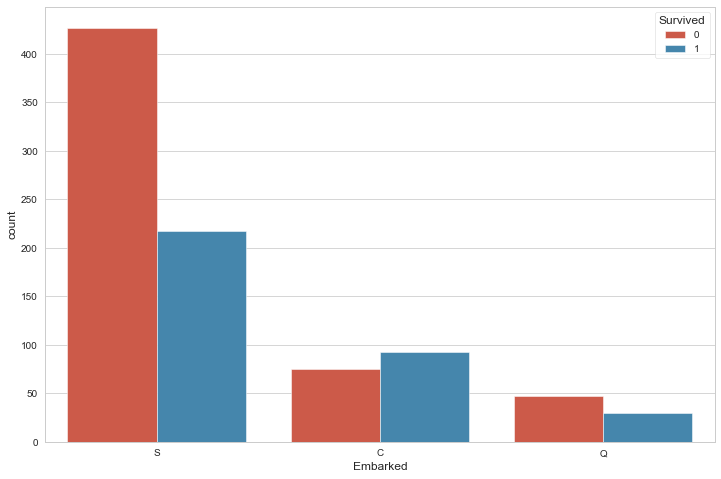

In [127]:
sns.countplot(x='Embarked',data=train,hue='Survived')

In [128]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [129]:
train['Embarked'].isnull().sum()

0

### 3.2.1.3 Cabin
I will see if there is any significance in this feature in predicting survival.

In [130]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [131]:
train['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [132]:
train['Cabin'].isnull().sum() / len(train['Cabin'])

0.7710437710437711

In [133]:
test['Cabin'].isnull().sum() / len(test['Cabin'])

0.7822966507177034

77% of 78% of Cabin data is missing in the Train and Test data. I will fill the missing values with 'Unknown' and use the first letter of the Cabin number as a feature.

In [134]:
train.Cabin.fillna('Unknown', inplace=True)
test.Cabin.fillna('Unknown', inplace=True)

In [135]:
train['Cabin'] = train['Cabin'].map(lambda x:x[0])
test['Cabin'] = test['Cabin'].map(lambda x:x[0])

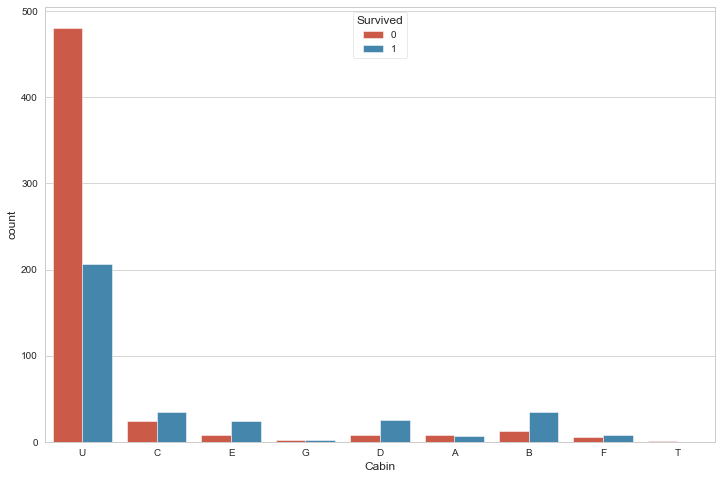

In [136]:
sns.countplot('Cabin', data=train,hue='Survived')

This plot shows that the majority of passengers without Cabin information did not survive, whereas those passengers that did have a Cabin were more likely to survive.

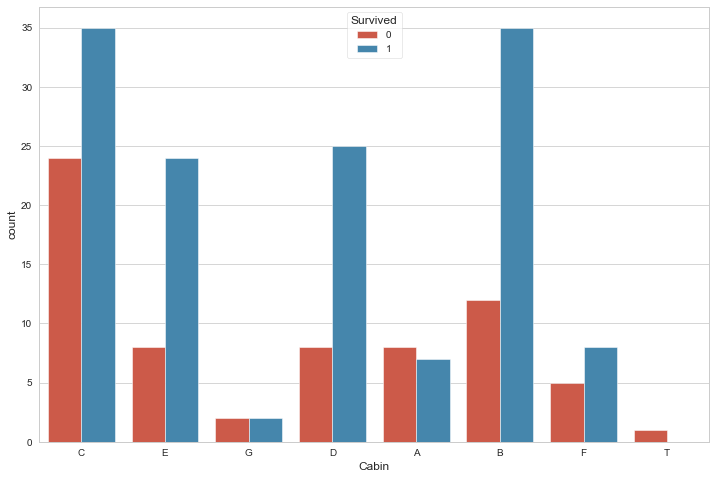

In [137]:
# drop the unknown values
sns.countplot('Cabin', data=train[train.Cabin != 'U'],hue='Survived')

In [138]:
train.groupby(['Cabin']).mean()[train.groupby(['Cabin']).mean().columns[1:2]]

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000
U,0.299854


#### 3.2.1.4 Fare
I will fill the single missing Fare value of the test data with the median.

In [139]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [140]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 3.2.2 Creating

#### 3.2.2.1 Family Size
Two existing features of Parch and SibSp can be used to determine total number of family members on board.

In [141]:
train['FamilySize'] = train['Parch'] + train['SibSp']
test['FamilySize'] = test['Parch'] + test['SibSp']

In [142]:
train.groupby(['FamilySize'])['Survived'].value_counts(normalize=True)

FamilySize  Survived
0           0           0.696462
            1           0.303538
1           1           0.552795
            0           0.447205
2           1           0.578431
            0           0.421569
3           1           0.724138
            0           0.275862
4           0           0.800000
            1           0.200000
5           0           0.863636
            1           0.136364
6           0           0.666667
            1           0.333333
7           0           1.000000
10          0           1.000000
Name: Survived, dtype: float64

These results indicate that those alone are only 30% likely to survive, those with 1-2 family members are 55-58% likely to survive, those with 3 family members are mostly to survive at 72%, those with 4+ family members are less likely to survive. I shall create a function to group these family size by these groupings.

In [143]:
def familyGrouping(x):
    """
    A function to group family sizes.
    """
    if x == 1 or x == 2:
        return 'small'
    elif x == 3:
        return 'medium'
    elif x >= 4:
        return 'large'
    else:
        return 'alone'

In [144]:
train['FamilySize'] = train['FamilySize'].apply(lambda x: familyGrouping(x))
test['FamilySize'] = test['FamilySize'].apply(lambda x: familyGrouping(x))

In [145]:
train.groupby(['Pclass','FamilySize'])['Survived'].mean()

Pclass  FamilySize
1       alone         0.532110
        large         0.666667
        medium        0.714286
        small         0.734043
2       alone         0.346154
        large         1.000000
        medium        0.769231
        small         0.600000
3       alone         0.212963
        large         0.074074
        medium        0.666667
        small         0.384615
Name: Survived, dtype: float64

#### 3.2.2.2 Title
The Name feature includes a name and title, which can be extracted into its own feature.

In [146]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,small


In [147]:
train['Title'] = train['Name'].apply(lambda x: (re.search(' ([A-Za-z]+)\.', x)).group(1))
test['Title'] = test['Name'].apply(lambda x: (re.search(' ([A-Za-z]+)\.', x)).group(1))

In [148]:
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


There are many unique titles other than the more common ones of: Mr, Mrs, Miss and Master. I will combine the unique titles.

In [149]:
train['Title'] = train['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'], 'Rare')
train['Title'] = train['Title'].replace(['Mlle', 'Ms'], 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [150]:
pd.crosstab(test['Title'],test['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [151]:
test['Title'] = test['Title'].replace(['Col', 'Dona', 'Dr', 'Rev'], 'Rare')
train['Title'] = train['Title'].replace('Ms', 'Miss')

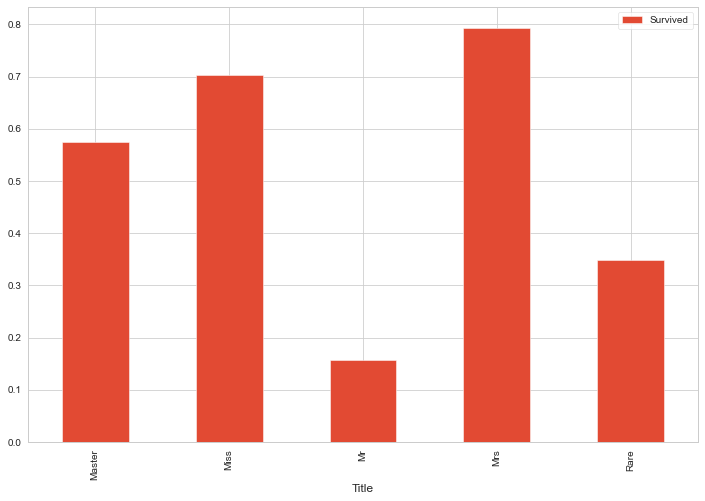

In [152]:
train[['Title','Survived']].groupby(['Title']).mean().plot(kind='bar')

In [153]:
train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

#### 3.2.2.3 Ticket
This feature is a combination of letters and numbers. This feature will be dropped.

In [154]:
train['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [155]:
train = train.drop('Ticket', axis=1)
test = test.drop('Ticket', axis=1)

#### Drop remaining unnecessary columns

In [156]:
# drop unnecessary columns
train = train.drop(['Name','SibSp','Parch'],axis=1)
test = test.drop(['Name','SibSp','Parch'],axis=1)

### 3.2.3 Convert Data
I will convert the categorical data to dummy variables for the machine learning algorithms. This will be performed after the exploratory analysis section.

## Step 4: Exploratory Analysis
Now the data has been cleaned, I will explore the data using descriptive and graphical statistics to describe and summarise the variables. I will see if there are correlations between feature and target variables.

In [157]:
train.groupby(['Survived']).describe().transpose()

Survived                    0           1
PassengerId count  549.000000  342.000000
            mean   447.016393  444.368421
            std    260.640469  252.358840
            min      1.000000    2.000000
            25%    211.000000  250.750000
            50%    455.000000  439.500000
            75%    675.000000  651.500000
            max    891.000000  890.000000
Pclass      count  549.000000  342.000000
            mean     2.531876    1.950292
            std      0.735805    0.863321
            min      1.000000    1.000000
            25%      2.000000    1.000000
            50%      3.000000    2.000000
            75%      3.000000    3.000000
            max      3.000000    3.000000
Age         count  549.000000  342.000000
            mean    29.787796   28.425936
            std     12.720646   13.943188
            min      1.000000    0.420000
            25%     23.000000   21.000000
            50%     25.000000   27.000000
            75%     37.000000   36.750000
            max     74.000000   80.000000
Fare        count  549.000000  342.000000
            mean    22.117887   48.395408
            std     31.388207   66.596998
            min      0.000000    0.000000
            25%      7.854200   12.475000
            50%     10.500000   26.000000
            75%     26.000000   57.000000
            max    263.000000  512.329200

In [158]:
train.groupby(['Cabin']).mean()[train.groupby(['Cabin']).mean().columns[1:2]]

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000
U,0.299854


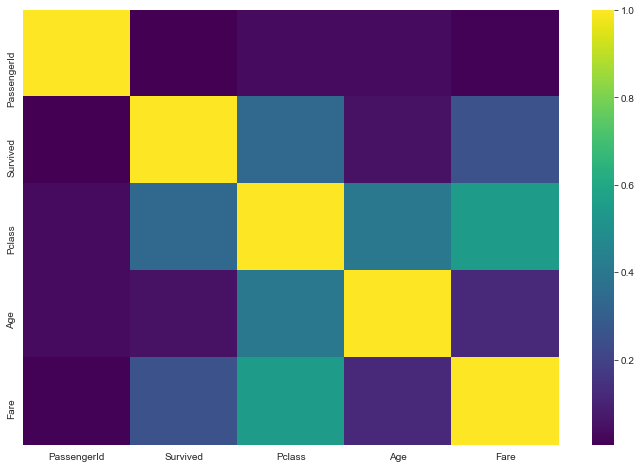

In [159]:
sns.heatmap(abs(train.corr()), cmap='viridis')

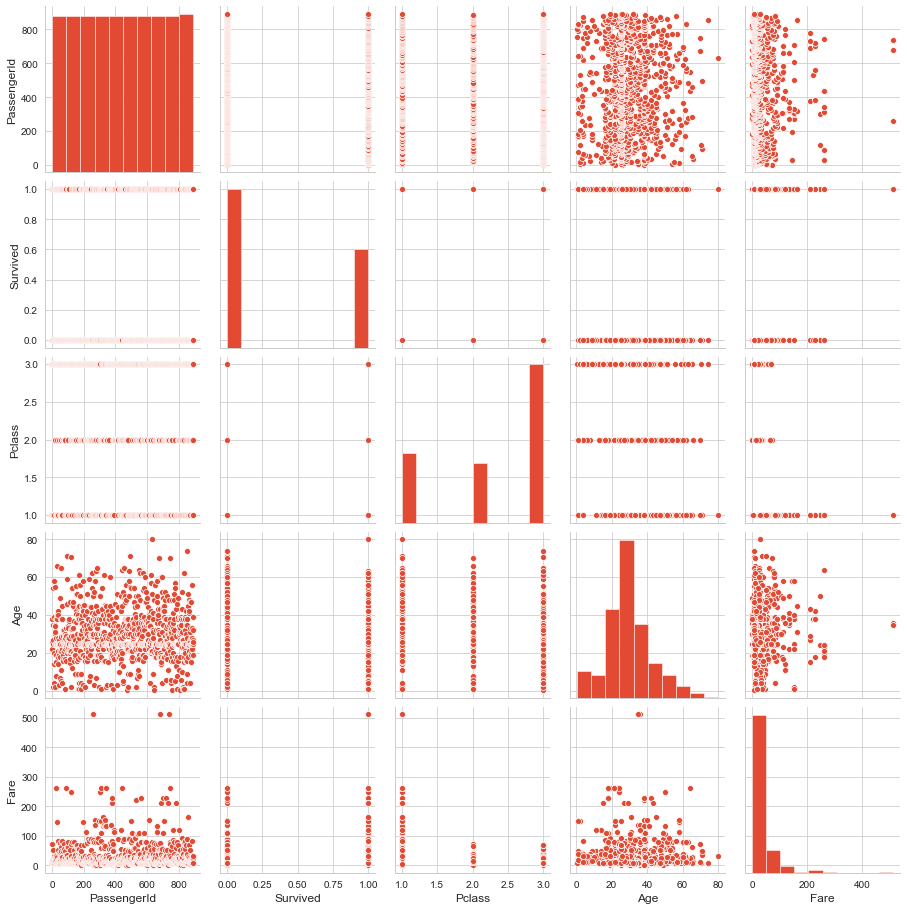

In [160]:
sns.pairplot(train)

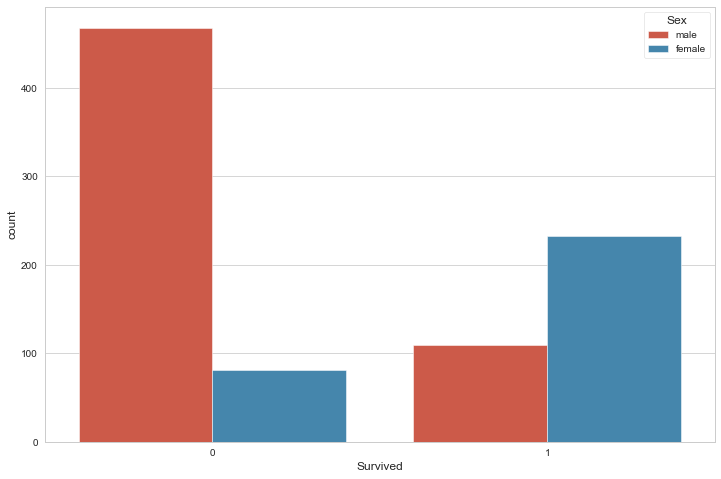

In [161]:
sns.countplot(x='Survived',data=train, hue='Sex')

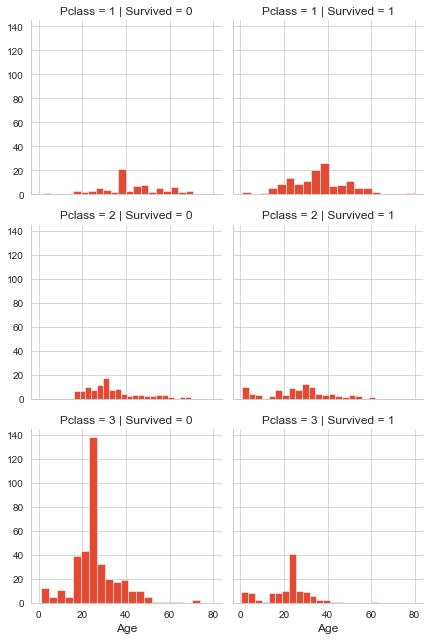

In [162]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend()

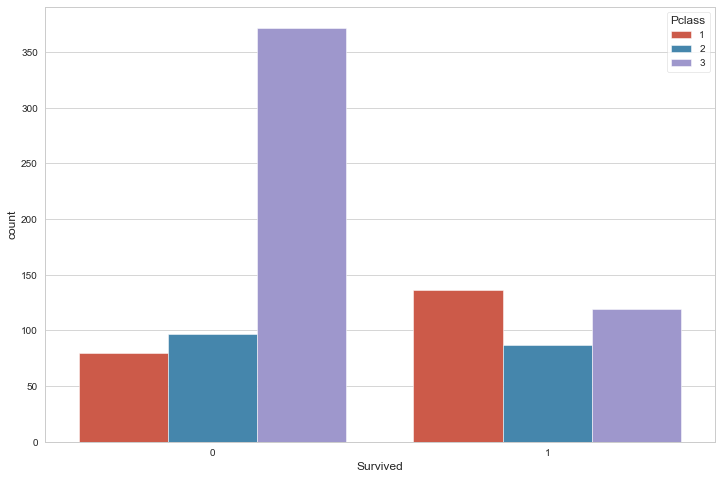

In [163]:
sns.countplot(x='Survived',data=train,hue='Pclass')

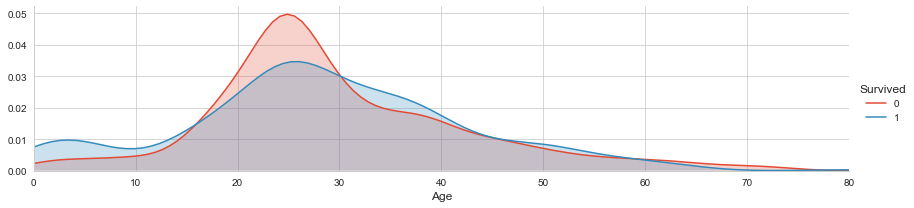

In [164]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid(train, hue='Survived', aspect=4)
a.map(sns.kdeplot, 'Age',shade=True)
a.set(xlim=(0, train['Age'].max()))
a.add_legend()

C:\Users\vinhe\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vinhe\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


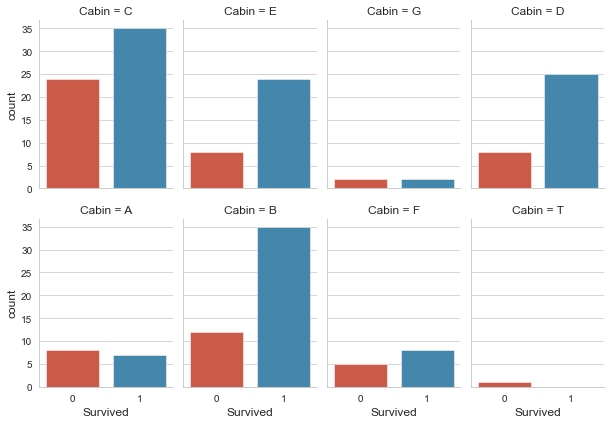

In [165]:
sns.factorplot('Survived', col='Cabin', data=train[train.Cabin != 'U'], kind='count', col_wrap=4, size=3, aspect=0.7)

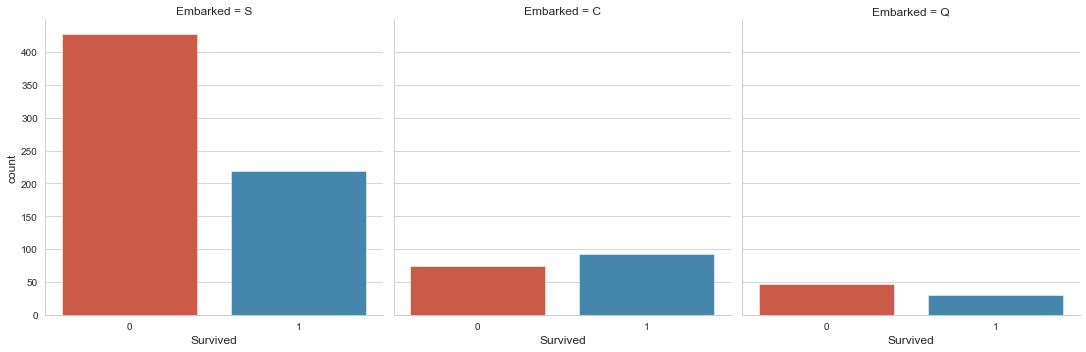

In [166]:
sns.factorplot('Survived', col='Embarked', data=train, kind='count')

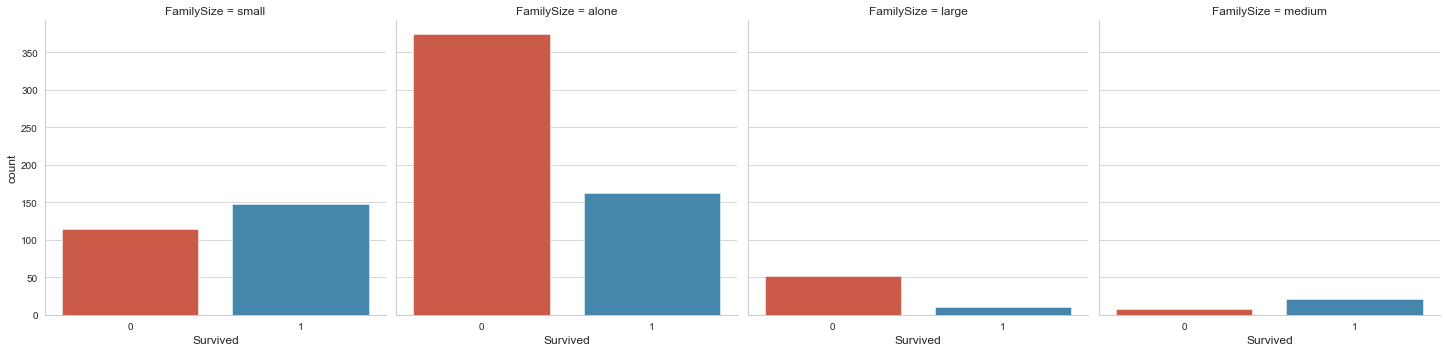

In [167]:
sns.factorplot('Survived', col='FamilySize', data=train, kind='count')

C:\Users\vinhe\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\vinhe\anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


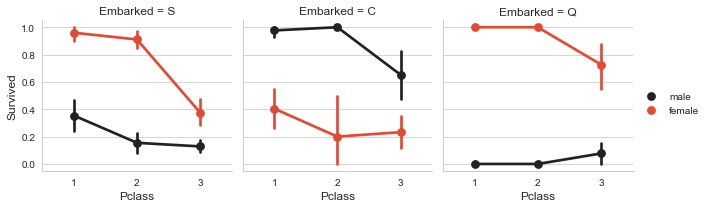

In [168]:
# how does embark correlate with Pclass, Sex and Survived features?
e = sns.FacetGrid(train, col='Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
e.add_legend()

In [169]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,male,22.0,7.2500,U,S,small,Mr
1,2,1,1,female,38.0,71.2833,C,C,small,Mrs
2,3,1,3,female,26.0,7.9250,U,S,alone,Miss
3,4,1,1,female,35.0,53.1000,C,S,small,Mrs
4,5,0,3,male,35.0,8.0500,U,S,alone,Mr


#### Observations
* Female passengers have a higher survival rate than males.
* The exception for this is when Embarked=C, where males had a higher survival rate. This may be due to a correlation between Pclass and embarked.
* Small and medium sized families have a higher survival rate than lone passengers and larger families.

### 3.2.3 Convert Data Continued

In [170]:
# Pclass is a categorical variable even though its datatype is an integer.
# Create a function to convert categorical data to dummy variables
for col in train.columns:
    if train[col].dtype == 'object' or col == 'Pclass':
        dummies = pd.get_dummies(train[col], drop_first=True)
        dummies = dummies.add_prefix('{}_'.format(col))
        train.drop(col,axis=1,inplace=True)
        train = train.join(dummies)
for col in test.columns:
    if test[col].dtype == 'object' or col == 'Pclass':
        dummies = pd.get_dummies(test[col], drop_first=True)
        dummies = dummies.add_prefix('{}_'.format(col))
        test.drop(col,axis=1,inplace=True)
        test = test.join(dummies)

## Step 5: Model Data
As mentioned earlier, the aim is to predict whether a passenger survived or not, this problem is a discrete target variable. I shall use a classification algorithm from the sklearn library. I will later use cross validation and scoring metrics to compare the various agorithms' performance.

In [171]:
train.head()

,PassengerId,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Cabin_B,Cabin_C,Cabin_D,...,Cabin_U,Embarked_Q,Embarked_S,FamilySize_large,FamilySize_medium,FamilySize_small,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,22.0,7.2500,0,1,1,0,0,0,...,1,0,1,0,0,1,0,1,0,0
1,2,1,38.0,71.2833,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1,26.0,7.9250,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
3,4,1,35.0,53.1000,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
4,5,0,35.0,8.0500,0,1,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0


In [172]:
test.head()

,PassengerId,Age,Fare,Pclass_2,Pclass_3,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,...,Embarked_Q,Embarked_S,FamilySize_large,FamilySize_medium,FamilySize_small,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rare
0,892,34.5,7.8292,0,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,893,47.0,7.0000,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,894,62.0,9.6875,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,895,27.0,8.6625,0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,896,22.0,12.2875,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [173]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel

In [174]:
X_train = train.drop(['Survived','PassengerId'],axis=1)
Y_train = train['Survived']
X_test = test.drop('PassengerId',axis=1)

X_train.shape, Y_train.shape, X_test.shape

((891, 22), (891,), (418, 22))

Now for feature selection. The following code ranks features by their importance for Random Forest. First, I start the parameters with "n_estimators=200" and then reiterate the number for optimisation.

In [175]:
clf = RandomForestClassifier(n_estimators = 100,
                            criterion = 'gini',
                            max_features = 'sqrt',
                            max_depth = None,
                            min_samples_split = 7,
                            min_weight_fraction_leaf = 0.0,
                            max_leaf_nodes = 18)
clf = clf.fit(X_train, Y_train)
indices = np.argsort(clf.feature_importances_)[::-1]

print('Feature ranking:')
for f in range(X_train.shape[1]):
    print('%d. feature %d %s (%f)' % (f + 1, indices[f], X_train.columns[indices[f]], clf.feature_importances_[indices[f]]))

Feature ranking:
1. feature 4 Sex_male (0.270996)
2. feature 19 Title_Mr (0.181850)
3. feature 1 Fare (0.091897)
4. feature 3 Pclass_3 (0.085788)
5. feature 0 Age (0.063092)
6. feature 20 Title_Mrs (0.060467)
7. feature 12 Cabin_U (0.048855)
8. feature 18 Title_Miss (0.045625)
9. feature 15 FamilySize_large (0.041717)
10. feature 17 FamilySize_small (0.020804)
11. feature 2 Pclass_2 (0.017644)
12. feature 14 Embarked_S (0.016295)
13. feature 8 Cabin_E (0.013363)
14. feature 21 Title_Rare (0.011837)
15. feature 5 Cabin_B (0.006807)
16. feature 7 Cabin_D (0.006629)
17. feature 16 FamilySize_medium (0.006262)
18. feature 13 Embarked_Q (0.004774)
19. feature 6 Cabin_C (0.002804)
20. feature 9 Cabin_F (0.001408)
21. feature 10 Cabin_G (0.000911)
22. feature 11 Cabin_T (0.000174)


Feature selection by sklearn based on importance weights.

In [176]:
model = SelectFromModel(clf, prefit=True)
train_new = model.transform(X_train)
train_new.shape

(891, 8)

In [177]:
best_features = X_train.columns[indices[0:train_new.shape[1]]]
X = X_train[best_features]
Xt = X_test[best_features]
best_features

Index(['Sex_male', 'Title_Mr', 'Fare', 'Pclass_3', 'Age', 'Title_Mrs',
       'Cabin_U', 'Title_Miss'],
      dtype='object')

This shows that Sex is the most important parameter which makes sense as the majority of boat spaces were given to women. Fare and Pclass are proven to show that wealth improved the chacnes of survival.

In [178]:
#Model

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_train, test_size=0.33, random_state = 101)

To see how various parameters influence the score of Random Forest, I am using code from: https://www.kaggle.com/creepykoala/titanic/study-of-tree-and-forest-algorithms

Text(0.5, 1.0, 'Max Leaf Nodes')

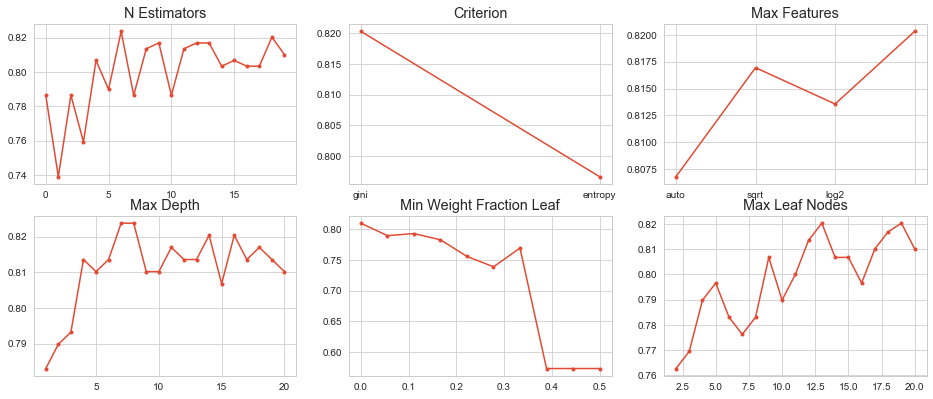

In [180]:
plt.figure(figsize=(16,10))

# N Estimators
plt.subplot(3,3,1)
feature_param = range(1,21)
scores = []
for feature in feature_param:
    clf = RandomForestClassifier(n_estimators=feature)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
plt.plot(scores, '.-')
plt.axis('tight')
plt.title('N Estimators')


# Criterion
plt.subplot(3,3,2)
feature_param = ['gini','entropy']
scores = []
for feature in feature_param:
    clf = RandomForestClassifier(criterion=feature)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(scores, '.-')
plt.title('Criterion')
plt.xticks(range(len(feature_param)), feature_param)

# Max Features
plt.subplot(3,3,3)
feature_param = ['auto', 'sqrt', 'log2', None]
scores = []
for feature in feature_param:
    clf = RandomForestClassifier(max_features=feature)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
plt.plot(scores, '.-')
plt.axis('tight')
plt.title('Max Features')
plt.xticks(range(len(feature_param)), feature_param)

# Max Depth
plt.subplot(3,3,4)
feature_param = range(1,21)
scores = []
for feature in feature_param:
    clf = RandomForestClassifier(max_depth=feature)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Max Depth')

# Min Weight Fraction Leaf
plt.subplot(3,3,5)
feature_param = np.linspace(0,0.5,10)
scores = []
for feature in feature_param:
    clf = RandomForestClassifier(min_weight_fraction_leaf = feature)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Min Weight Fraction Leaf')

# Max Leaf Nodes
plt.subplot(3,3,6)
feature_param = range(2,21)
scores = []
for feature in feature_param:
    clf = RandomForestClassifier(max_leaf_nodes=feature)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Max Leaf Nodes')

These graphs will be the basis for the tuning of the model. I will run a GridSearchCV by inputting the parameters and their potential values.

In [104]:
forest = RandomForestClassifier(max_depth = 50,
                               min_samples_split = 7,
                               min_weight_fraction_leaf = 0.0,
                               max_leaf_nodes = 18)

parameter_grid = {'n_estimators' : [15, 100, 200],
                 'criterion' : ['gini', 'entropy'],
                 'max_features' : ['auto', 'sqrt', 'log2', None]}

grid_search = GridSearchCV(forest, param_grid=parameter_grid, cv=StratifiedKFold(5))
grid_search.fit(X, Y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8395141547925429
Best parameters: {'criterion': 'gini', 'max_features': None, 'n_estimators': 200}


In [107]:
forest = RandomForestClassifier(n_estimators = 200,
                               criterion = 'entropy',
                               max_features = None)
parameter_grid = {'max_depth' : [None, 50],
                  'min_samples_split' : [7, 11],
                  'min_weight_fraction_leaf' : [0.0, 0.2],
                  'max_leaf_nodes' : [18, 20]
                 }

grid_search = GridSearchCV(forest, param_grid=parameter_grid, cv=StratifiedKFold(5))
grid_search.fit(X, Y_train)
print('Best scores: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best scores: 0.8350072186303434
Best parameters: {'max_depth': None, 'max_leaf_nodes': 20, 'min_samples_split': 11, 'min_weight_fraction_leaf': 0.0}


In [109]:
# My optimal parameters
clf = RandomForestClassifier(n_estimators = 200,
                             criterion = 'entropy',
                             max_features = None,
                             max_depth = 50,
                             min_samples_split = 7,
                             min_weight_fraction_leaf = 0.0,
                             max_leaf_nodes = 18)

clf.fit(X, Y_train)
Y_pred_RF = clf.predict(Xt)

clf.score(X_test, y_test)

0.8745762711864407

In [112]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': Y_pred_RF
    })
submission.to_csv('titantic.csv',index=False)